# Data-Visualisation

Visualising Data for Modulation Classification

## Imports

### Connecting to Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Modulation-Classification/RadioML-Dataset/Visualizations

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Modulation-Classification/RadioML-Dataset/Visualizations


### Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import collections

!pip3 install autokeras==1.0.12
!pip3 install tensorflow==2.4
!pip3 install keras-tuner==1.0.2
import autokeras as ak
import tensorflow as tf

## Importing Data

In [3]:
# Clean Data
f = open("../Data/Clean-Data/Clean_X_Valid.pkl","rb")
Clean_X_Valid = pickle.load(f)

f = open("../Data/Clean-Data/Clean_y_Valid.pkl","rb")
Clean_y_Valid = pickle.load(f)

# PGD Attacked Samples
f = open("../Data/PGD-Attack/Adversarial-Data-Valid/Adversarial_X_Valid.pkl","rb")
PGD_Adversarial_X_Valid = pickle.load(f)

f = open("../Data/PGD-Attack/Adversarial-Data-Valid/Adversarial_y_Valid.pkl","rb")
PGD_Adversarial_y_Valid = pickle.load(f)

# CW Attacked Samples
f = open("../Data/CW-Attack/Adversarial-Data-Valid/Adversarial_X_Valid.pkl","rb")
CW_Adversarial_X_Valid = pickle.load(f)

f = open("../Data/CW-Attack/Adversarial-Data-Valid/Adversarial_y_Valid.pkl","rb")
CW_Adversarial_y_Valid = pickle.load(f)

# Modulation Data
f = open("../Data/Dataset/ModulationMap.pkl", "rb")
ModulationMap = pickle.load(f)
print (ModulationMap)

{0: '8PSK', 1: 'AM-DSB', 2: 'AM-SSB', 3: 'BPSK', 4: 'CPFSK', 5: 'GFSK', 6: 'PAM4', 7: 'QAM16', 8: 'QAM64', 9: 'QPSK', 10: 'WBFM'}


# Visualizations

Visualizations of signals with $0$dB as SNR

In [4]:
Clean_X_Valid = Clean_X_Valid[0]
PGD_Adversarial_X_Valid = PGD_Adversarial_X_Valid[0]
CW_Adversarial_X_Valid = CW_Adversarial_X_Valid[0]
Clean_y_Valid = Clean_y_Valid[0]
PGD_Adversarial_y_Valid = PGD_Adversarial_y_Valid[0]
CW_Adversarial_y_Valid = CW_Adversarial_y_Valid[0]

DataDescriptions = [(Clean_X_Valid, Clean_y_Valid, "Clean Samples"), 
                    (PGD_Adversarial_X_Valid, PGD_Adversarial_y_Valid, "PGD Samples"),
                    (CW_Adversarial_X_Valid, CW_Adversarial_y_Valid, "CW Samples")]

Plots

In [5]:
def Visualization(DataDescriptions):
    N = DataDescriptions[0][0].shape[0]
    
    for i in range(0,N,200):
        c = 1

        plt.figure(figsize=(24,6))

        for X,y,Description in DataDescriptions:
            modType = ModulationMap[np.argmax(y[i])]
            
            plt.subplot(1,3,c)
            plt.grid()
            plt.scatter(X[i][0,:], X[i][1,:])
            plt.title(modType + " " + Description)

            c += 1

        plt.savefig("Images/" + modType + ".eps", dpi=125)
        plt.show()
        print ()

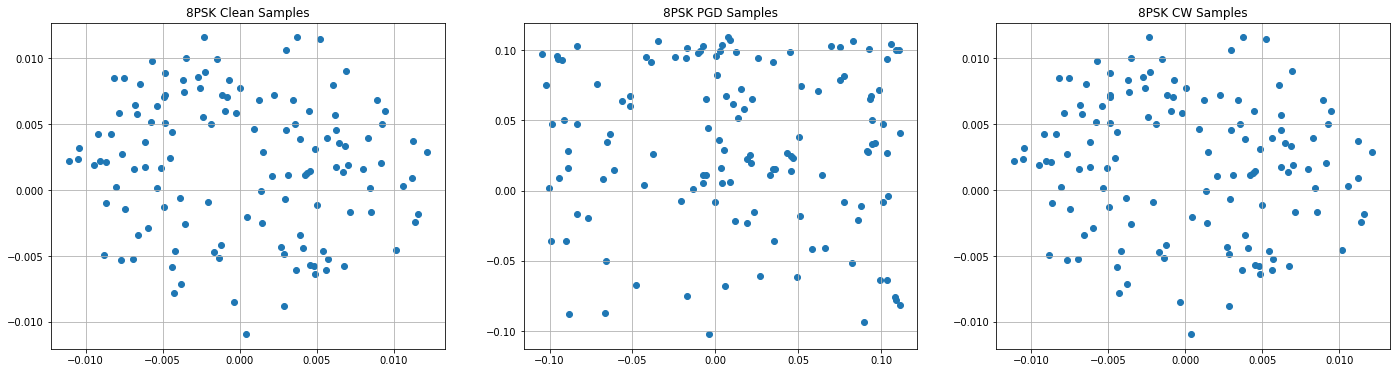

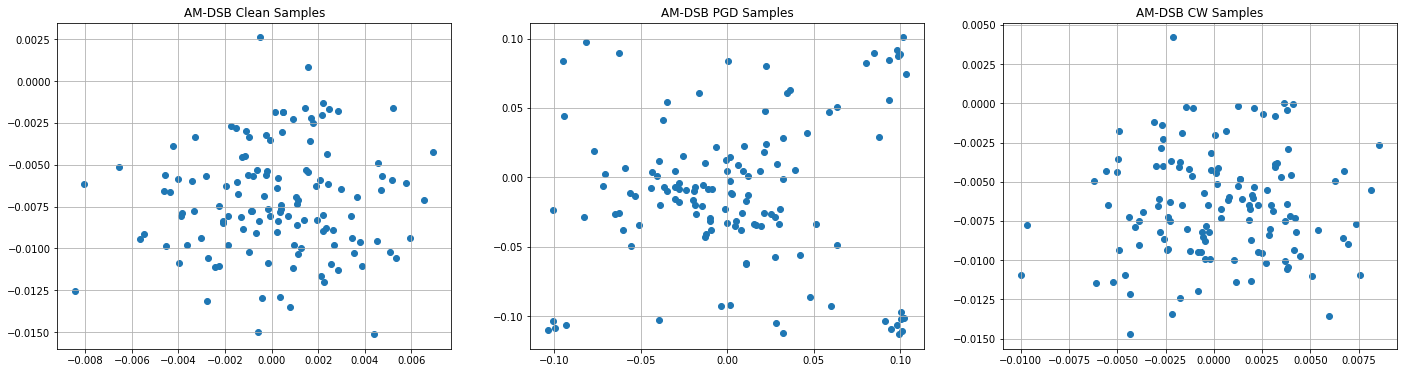

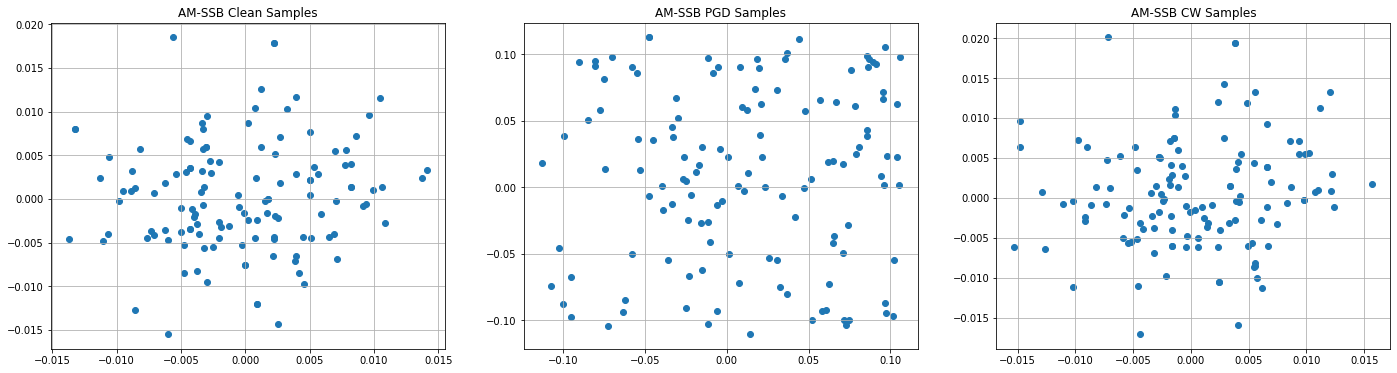

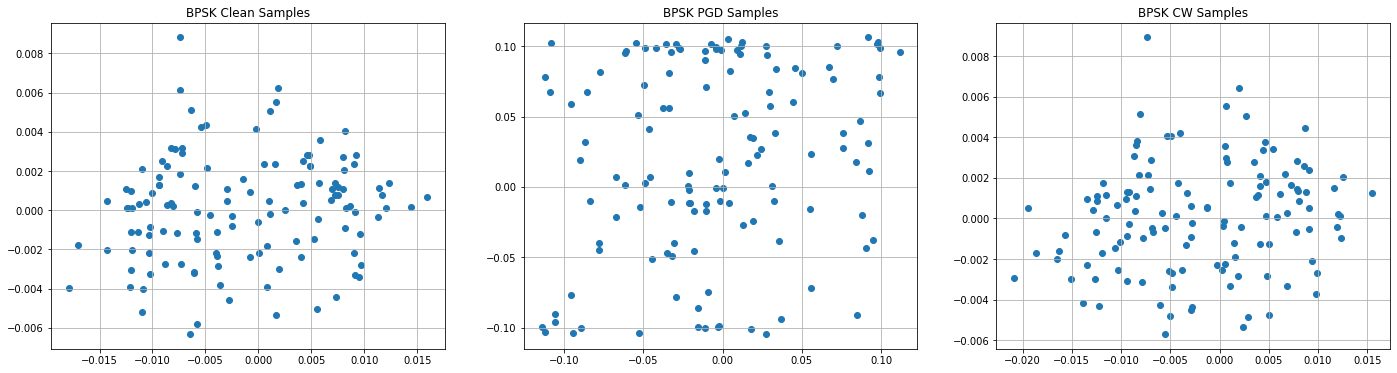

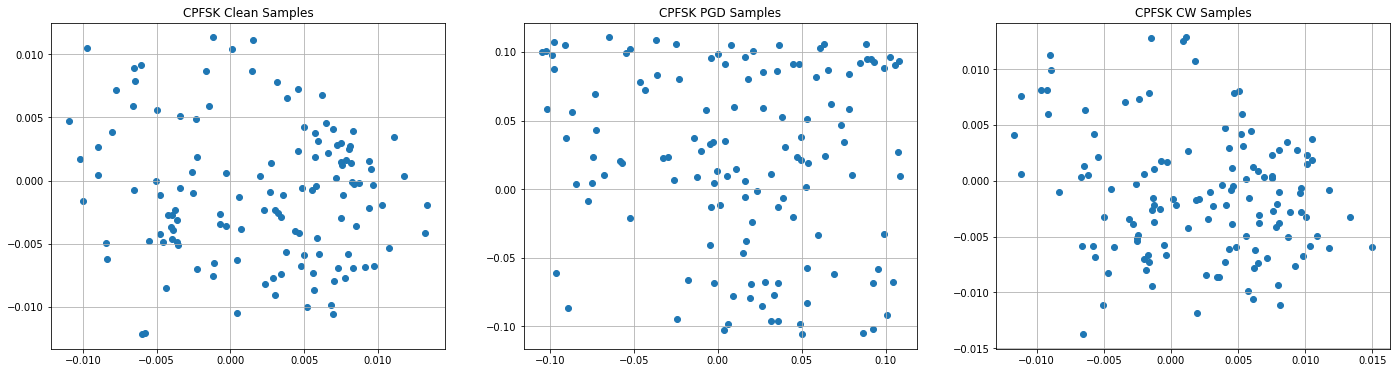

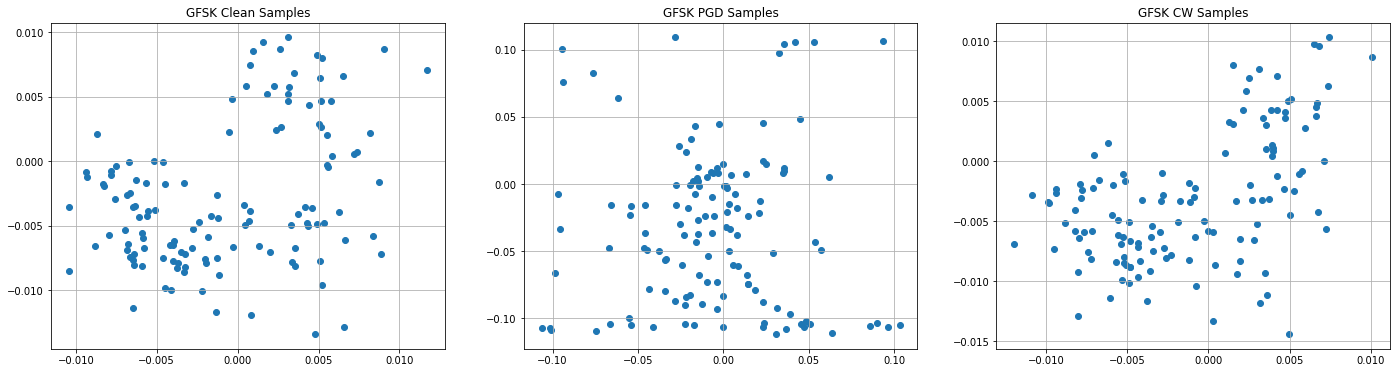

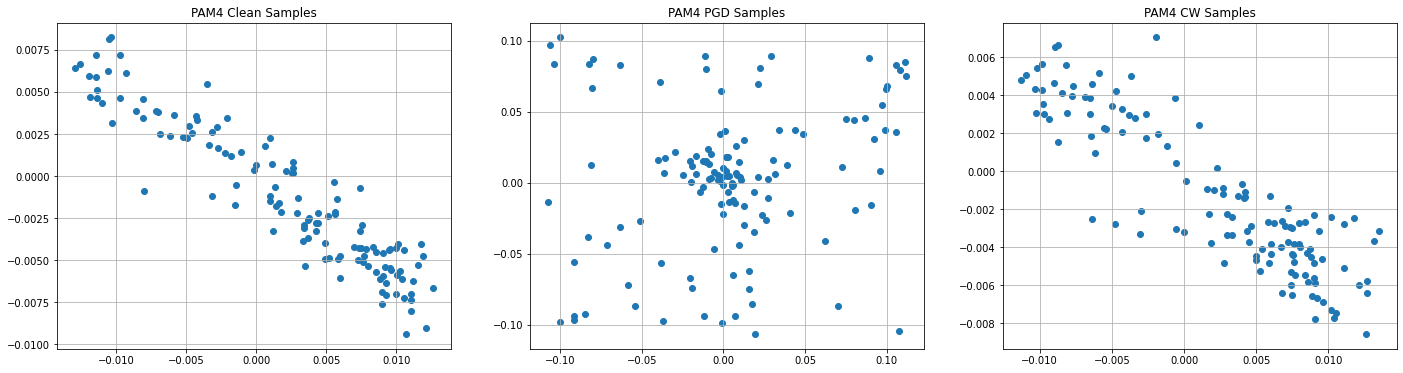

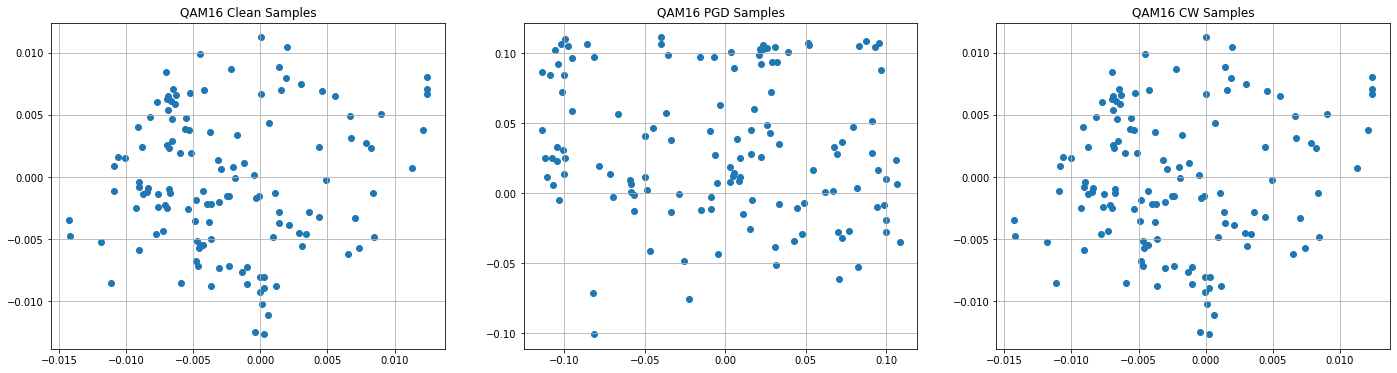

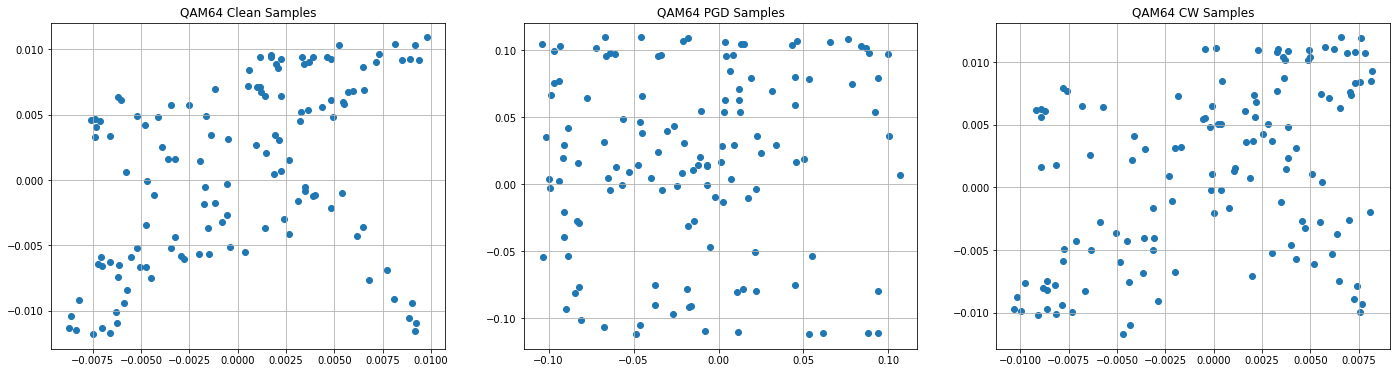

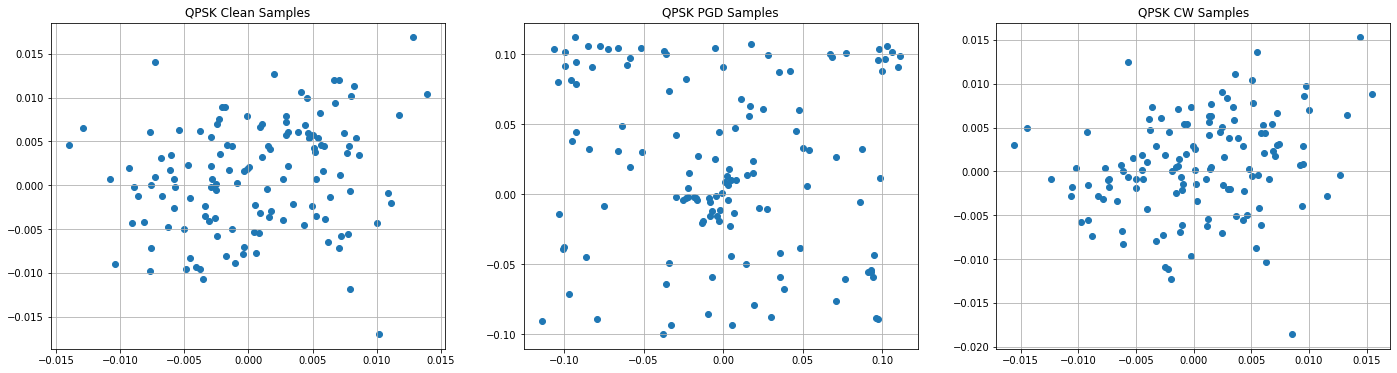

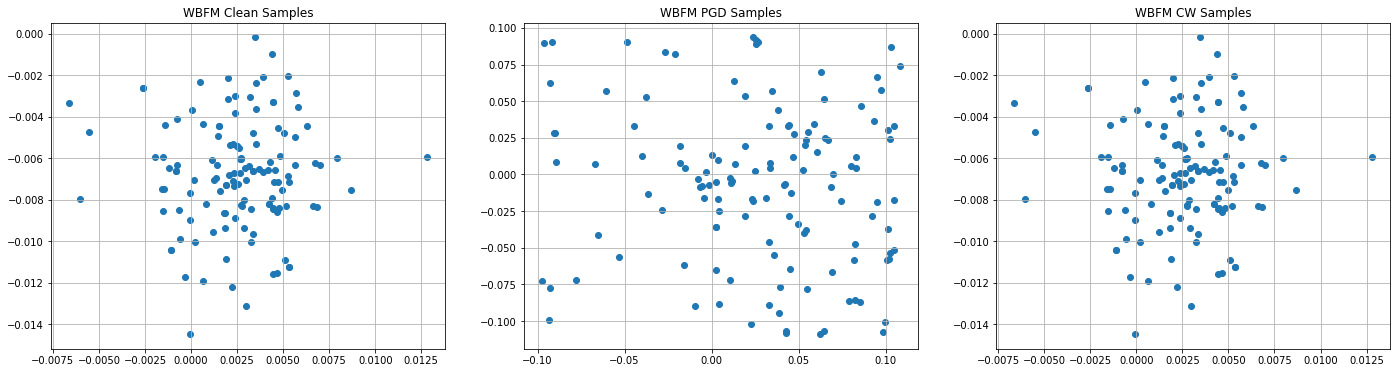

In [6]:
Visualization(DataDescriptions)